<a href="https://colab.research.google.com/github/eji58/ML_Models/blob/main/KMeans_dog_or_horse_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans Clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,rand_score 

# Dog Horse KMeans Challenge

In [ ]:
# Import Data
df_dh = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv")
# We picked variables that we need
X = df_dh[['height', 'weight']]
df_dh.head()

,height,weight,target,type
0,27.0,71.0,0.0,dog
1,27.0,92.0,0.0,dog
2,32.0,47.0,0.0,dog
3,30.0,90.0,0.0,dog
4,28.0,91.0,0.0,dog


In [ ]:
# Scale Data
scaler = StandardScaler()
# Fit & transform data.
X = scaler.fit_transform(X)


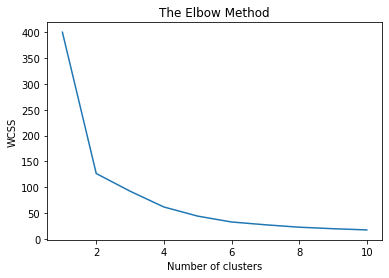

In [ ]:
# Create Elbow Plot

# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 
for i in range(1,11):
  kmeans_dh=KMeans(n_clusters=i, init="k-means++", random_state = 123)
  kmeans_dh.fit(X)
  wcss.append(kmeans_dh.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [ ]:
# Apply KMeans and Plot KMeans Results and Actual Results
kmeans_dh = KMeans(n_clusters =2, init = 'k-means++', random_state = 123)
y_kmeans = kmeans_dh.fit_predict(X)

In [ ]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0]


In [ ]:
# Cluster centeriods
print (kmeans_dh.cluster_centers_)

[[ 0.96628215  0.91732732]
 [-0.74395174 -0.70626086]]


In [ ]:
# assign the y_kmeans to a new column in the dataset
df_dh['kmean_prid']= y_kmeans
df_dh

,height,weight,target,type,kmean_prid
0,27.0,71.0,0.0,dog,1
1,27.0,92.0,0.0,dog,1
2,32.0,47.0,0.0,dog,1
3,30.0,90.0,0.0,dog,1
4,28.0,91.0,0.0,dog,1
...,...,...,...,...,...
195,55.0,140.0,1.0,horse,0
196,82.0,179.0,1.0,horse,0
197,46.0,132.0,1.0,horse,0
198,56.0,89.0,1.0,horse,1


In [ ]:
# replace dog with 1 and horse with 0 to help us caluclate the Accuracy Score
df_dh['type'].replace({"dog":1,"horse":0},inplace=True)

In [ ]:
df_dh

,height,weight,target,type,kmean_prid
0,27.0,71.0,0.0,1,1
1,27.0,92.0,0.0,1,1
2,32.0,47.0,0.0,1,1
3,30.0,90.0,0.0,1,1
4,28.0,91.0,0.0,1,1
...,...,...,...,...,...
195,55.0,140.0,1.0,0,0
196,82.0,179.0,1.0,0,0
197,46.0,132.0,1.0,0,0
198,56.0,89.0,1.0,0,1


In [ ]:
# Calculate the number of correct predictions
(df_dh['type'] == df_dh['kmean_prid']).value_counts()

True     187
False     13
dtype: int64

In [ ]:
# Compute Accuracy Score of KMean Labels with True Labels
accuracy_score(df_dh['type'],df_dh['kmean_prid'])*100

93.5

# Seattle Weather KMeans Challenge

In [ ]:
df_sea = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv")
X_sea = df_sea[['tmax', 'tmin']]
df_sea.head()

,ds,prcp,tmax,tmin,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [ ]:
df_sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      25551 non-null  object 
 1   prcp    25548 non-null  float64
 2   tmax    25551 non-null  int64  
 3   tmin    25551 non-null  int64  
 4   rain    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [ ]:
# Scale Data
scaler = StandardScaler()
# Fit & transform data.
X_sea= scaler.fit_transform(X_sea)


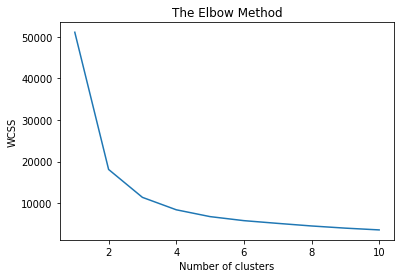

In [ ]:
# Create Elbow Plot

# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 

for i in range(1,11):
  kmeans_dh=KMeans(n_clusters=i, init="k-means++", random_state = 123)
  kmeans_dh.fit(X_sea)
  wcss.append(kmeans_dh.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# From the plot we can see that the optimal number of clusters in 4, but our target is 2 so we should pick 2.

In [ ]:
# Apply KMeans and Plot KMeans Results and Actual Results
# Apply KMeans and Plot KMeans Results and Actual Results
kmeans_sea = KMeans(n_clusters =2, init = 'k-means++', random_state = 123)
y_kmeans = kmeans_sea.fit_predict(X_sea)

In [ ]:
print(y_kmeans)

[1 1 1 ... 1 1 1]


In [ ]:
# assign the y_kmeans to a new column
df_sea['kmean_prid']= y_kmeans
df_sea

,ds,prcp,tmax,tmin,rain,kmean_prid
0,1948-01-01,0.47,51,42,True,1
1,1948-01-02,0.59,45,36,True,1
2,1948-01-03,0.42,45,35,True,1
3,1948-01-04,0.31,45,34,True,1
4,1948-01-05,0.17,45,32,True,1
...,...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False,1
25547,2017-12-11,0.00,49,29,False,1
25548,2017-12-12,0.00,46,32,False,1
25549,2017-12-13,0.00,48,34,False,1


In [ ]:
df_sea['rain'].isnull().sum()

3

In [ ]:
# replace True with 1 and False with 0 to help us caluclate the Accuracy Score
df_sea['rain'].replace({True:'1',False:'0',np.nan:'0'},inplace=True)
df_sea['rain']=df_sea['rain'].astype(int)


In [ ]:
df_sea.rain.value_counts()

0    14651
1    10900
Name: rain, dtype: int64

In [ ]:
df_sea.rain.dtype

dtype('int64')

In [ ]:
# Calculate the number of correct predictions
(df_sea['rain'] == df_sea['kmean_prid']).value_counts()

True     16269
False     9282
dtype: int64

In [ ]:
# Compute Accuracy Score of KMean Labels with True Labels
accuracy_score(df_sea['rain'] ,df_sea['kmean_prid'])

0.6367265469061876

# Random Blob KMeans Challenge

- You dont have true labels for this data so this is truly an unsupervised dataset
- The blobs are randomly generated every time you run the cell and their characteristics are:
    - 2000-4000 data points
    - 10-30 blobs created

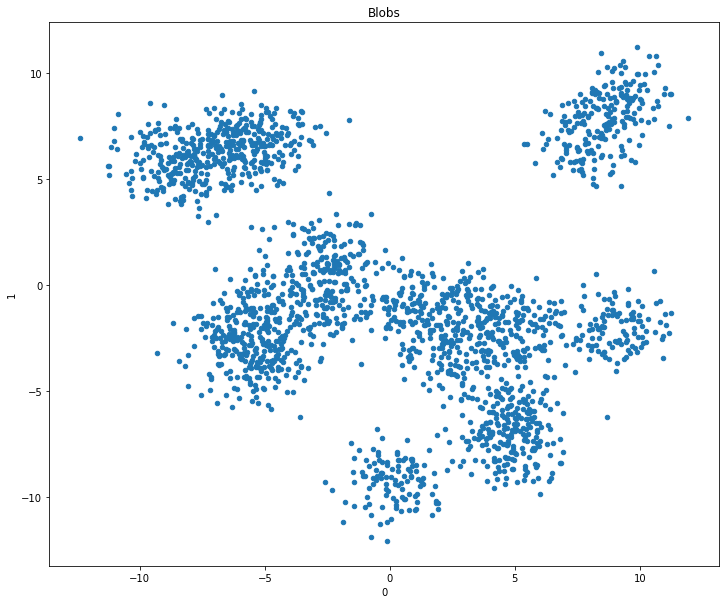

In [ ]:
df_blob = pd.DataFrame(make_blobs(random.randint(2000,4000), centers=random.randint(10,30))[0])
df_blob.plot(kind="scatter", x=0, y=1, title="Blobs", figsize=(12,10));

In [ ]:
df_blob

,0,1
0,-5.563721,-2.415222
1,-3.570792,-3.893468
2,11.009645,-1.385751
3,-5.636427,-1.156079
4,1.305347,0.134546
...,...,...
2103,-5.859603,-0.835648
2104,-6.503454,7.402640
2105,8.081246,-2.495698
2106,-8.505075,5.294948


In [ ]:
# Scale Data
scaler = StandardScaler()
# Fit & transform data.
X_b = scaler.fit_transform(df_blob)


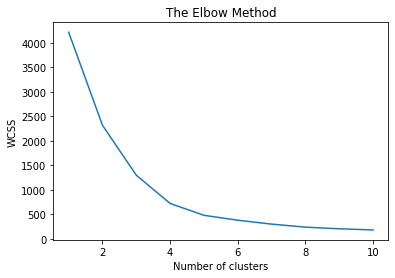

In [ ]:
# Create Elbow Plot

# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 
for i in range(1,11):
  kmeans_dh=KMeans(n_clusters=i, init="k-means++", random_state = 123)
  kmeans_dh.fit(X_b)
  wcss.append(kmeans_dh.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()




In [ ]:
# Apply KMeans and Plot KMeans Results and Actual Results
kmeans_b = KMeans(n_clusters =3, init = 'k-means++', random_state = 123)
y_kmeans = kmeans_b.fit_predict(X_b)

In [ ]:
# assign the y_kmeans to a new column in the dataset
df_blob['label']=y_kmeans

In [ ]:
df_blob

,0,1,label
0,-5.563721,-2.415222,2
1,-3.570792,-3.893468,2
2,11.009645,-1.385751,0
3,-5.636427,-1.156079,2
4,1.305347,0.134546,0
...,...,...,...
2103,-5.859603,-0.835648,2
2104,-6.503454,7.402640,2
2105,8.081246,-2.495698,0
2106,-8.505075,5.294948,2


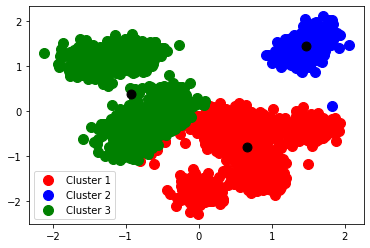

In [ ]:
# Plot the clusters 
# Getting the Centroids
centroids = kmeans_b.cluster_centers_
 
# plotting the results:
 
plt.scatter(X_b[y_kmeans == 0, 0], X_b[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_b[y_kmeans == 1, 0], X_b[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_b[y_kmeans == 2, 0], X_b[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()